# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand the challenges of information retrieval on Wikipedia articles
* Weighted kNN algorithm for relevance feedback 
* Rocchio algorithm for relevance feedback 

In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/10march/Rocchio.mp4" type="video/mp4">
</video>
""")

## Dataset

### History:
Wikipedia dataset is the most widely-used dataset for information retrieval. It is based on Wikipedia’s "featured articles", a continually updated article collection. There are totally 29 categories in "featured articles", but only 10 most populated ones are actually considered. Each article is split into several sections according to its section headings. This dataset is finally generated as a set of 2,866 image/text pairs.

As an important benchmark dataset for information retrieval, Wikipedia dataset has been widely used since being publicly available.

**Wikipedia featured articles:**

Featured articles are considered to be some of the best articles Wikipedia has to offer, as determined by Wikipedia's editors. They are used by editors as examples for writing other articles. Articles are reviewed as featured article candidates for accuracy, neutrality, completeness, and style, before being added to . There are 5,410 featured articles out of 5,754,701 articles on the English Wikipedia (~0.1% are featured).

### Description:

The dataset contains the following:
1. 2866 Wikipedia articles belonging to a total of 10 categories.
2. Each article is given a query ID based on it's category.
    
    Example of a query ID for a document is 25. 

The 10 categories are:
>
    1. Art
    2. Biology
    3. Geography
    4. History
    5. Literature
    6. Media
    7. Music
    8. Royalty
    9. Sport
    10. Warfare

### Challenges:

The following challenges are associated with query based retrieval of documents:

1.   Incomplete query or semantically wrong query
2.   Huge number of documents returnes as a result to the query

## Domain Information



Information Retrieval (IR) systems allow users to access large amounts of data. A user submitting a request to an IR system will receive a number of results relating to the request. The results may include images, pieces of text,
web pages, segments of video or speech samples. 

But, theusers may not have a well-developed idea of what information they are searching for, they may not be able to express entirely what they want into a suitable query and they may not have a good idea of what information is available for retrieval. 

To solve the above problem, the system after presenting the user with an initial set of documents a feedback mechanism could identify those documents that had useful information. This is the Relevance Feedback (RF). The system then can use this information quantitatively - retrieving more documents like the relevant documents - and qualitatively - retrieving only those documents similar to the relevant documents. Therefore RF is a cycle.

The image below helps us understand the Relevance Feedback cycle:

<img src = "
https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/1.1.png" width = "700" height = "500">

## AI / ML Technique

### Relevance Feedback for Information Retrieval

In this experiment, dataset is queried to get relevant documents. The significant part of any Information retrieval system is to make it responsive to user interaction. Hence our system needs to incorporate the feedback and refine the results using the feedback on the fly.

Search engines like Google, Bing and other websites like Youtube are use - cases which personalize the content for a better user experience.

In this experiment we implement two algorithms to achieve adaptive retrieval based on user input.

Below steps are specific to this experiment. In the real-word, based on the usecase, few or all of these steps can be applied.

1. #### Weighted kNN 

     The steps are:

    - Random list of wikipedia documents (varied category) are displayed to the User. 
    - The user based on his interest clicks on any document belonging to a particular category. 
    - We implement a weighted kNN to get a ranking of the relevant documents based on the user input.
    - The user then again clicks a document of the relevant documents.
    - We update the weight vector based on this feedback to get a new ranking which ensures better recall than before

2. #### Rocchio Algorithm

     The steps are:
      
    - Random list of documents are displayed.
    - The user clicks on a particular document and also decides the relevant and non relevant documents of the displayed ones.
    - The initial document clicked is our Query $q$ (initial centroid for relevant documents). <br> Relevant Documents are $D_{r}$, Non relevant ones are $D_{nr}$.
    - We use the following formula to converge to a new centroid for the relevant documents.<br> This ensures better precision with every iteration
    
    $$q_{t+1} = a . q_{t} + b. (\frac{1}{|D_{r}|} \sum_{d_{j} \in D_{r}} d_{j}) - c. (\frac{1}{|D_{nr}|} \sum_{d_{k} \in D_{nr}} d_{k})$$
    
    - Display the nearest neighbours of the new centroid $q_{t+1}$, which would be more relevant

## Keywords

* Rocchio's algorithm
* weighted KNN
* KNN


### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M2W3E28_Rocchios_Algorithm" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week12/Exp1/wikipedia_dataset.tar.gz")
    ipython.magic("sx pip install lxml")
    ipython.magic("sx tar xvf  wikipedia_dataset.tar.gz")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
from lxml import etree
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
import numpy as np
import random
from bs4 import BeautifulSoup as Soup
from collections import Counter
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import os
from IPython.display import clear_output
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [7]:
f = open('wikipedia_dataset/categories.list')
cats = f.readlines()
f = open('wikipedia_dataset/categories_originalids.list')
cat = f.readlines()
print('The following ' + str(len(cats)) + ' categories', cats)

The following 10 categories ['art\n', 'biology\n', 'geography\n', 'history\n', 'literature\n', 'media\n', 'music\n', 'royalty\n', 'sport\n', 'warfare\n']


## Parsing the XML data files 

In [0]:
def parseLog(file, docs, qid):
    handler = open(file).read()
    soup = Soup(handler,'lxml')
    #print(soup.findAll('text')[0])
    txt = soup.findAll('text')[0].text       
    for message in soup.findAll('document'):
        msg_attrs = dict(message.attrs)
        qid.append(int(msg_attrs['cat']))
        docs.append(msg_attrs['name'] + ' ' + txt)

lis = glob('wikipedia_dataset/texts/*')
docs = []
qid = []
for i in range(len(lis)):
    parseLog(lis[i], docs, qid)


In [17]:
(Soup(open(lis[100]).read(),'lxml').findAll('document'))

[<document cat="1" id="6955ec08f8a39245ca478737a226da78-4" name="André_Kertész">
 <text>
 Kertész arrived in New York with his wife on 15 October 1936, intent on rekindling his inspiration and finding fame as a photographer in America. He and his wife lived out of the Beaux Arts Hotel in Greenwich Village. From his arrival, Kertész found life in America harder than he had imagined and thus started what he would refer to later in his life as the "absolute tragedy". He was now deprived of his French artist friends and the people in America did not respond as kindly as in Paris when their picture was being taken. Soon after his arrival, Kertész approached Beaumont Newhall, the Museum of Modern Art's photographic department director, who was readying a show entitled ''Photography 1839–1937''. But when Kertész offered Newhall some of his ''Distortions'' photographs to display, Newhall criticized them, which offended Kertész, who never forgave him. Despite this, Newhall took the photographs 

In [9]:
print('Sample document:', qid[100], docs[100][:100] + '...')

Sample document: 1 André_Kertész 
Kertész arrived in New York with his wife on 15 October 1936, intent on rekindling hi...


## Construct feature vector from documents

Dataset used below present in the "Datasets" folder.

In [0]:
stoplist = open('wikipedia_dataset/stopwords.txt').read().splitlines()

In [0]:
## TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=stoplist, min_df=0.001)
matrix = vectorizer.fit_transform(docs)
doc_vectors = matrix.todense()
doc_vectors = np.array(doc_vectors)
vocab = vectorizer.vocabulary_

### Read about min_df parameter used above.
Vary the parameter to change the feature and see it's effect on the final results.

In [18]:
print('Length of the vocabulary:', len(vocab))
print('A sample ' +str(len(vocab)) +' dimensional document vector:', doc_vectors[1][:100])

Length of the vocabulary: 24841
A sample 24841 dimensional document vector: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05863422 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

In [19]:
print(doc_vectors.shape, len(qid))

(2866, 24841) 2866


### 1. Weighted KNN 
- Initially display random 20 documents and get user click
- Run the KNN Algorithm and chose 100 nearest neighbours
- Define a weight matrix to get the ranking of the 100 relavent vectors based on similarity

Given $m$ - dimensional query $q$ and document $d_{i}$, the weighted similarity is calculated as follows <br> 
$q = (q_{1}, q_{2}, \cdots, q_{m})$ <br>
$d_{i} = (d_{1}, d_{2}, \cdots, c_{m})$ <br>
$$Similarity = w^T d'_{i}$$ where ,
$$d'_{i} = \frac{q * d_{i}}{\parallel q \parallel \parallel d_{i} \parallel}  $$

In [20]:
## Fit KNN
KNN = NearestNeighbors(100, 0.4, metric = 'cosine')
KNN.fit(doc_vectors)
neighbours = KNN.kneighbors(doc_vectors,return_distance=False)
print(neighbours.shape)

(2866, 100)


In [0]:
# Number of articles displayed at max 100
num = 10
div = 1 # Change the value to see the effect

,index,Article,category
0,2827,If_(magazine) \n''If'' was a digest-sized maga...,Literature and theatre
1,2777,The_Supremes \nThe Supremes began by performin...,Music
2,1183,Authentic_Science_Fiction \nFor the first twen...,Literature and theatre
3,1173,Monarchy_of_the_United_Kingdom \nIn the uncodi...,"Royalty, nobility and heraldry"
4,891,Nagorno-Karabakh_War \nIn the aftermath of Kho...,Warfare
5,1166,Hungarian_Revolution_of_1956 \nDespite Cold Wa...,History
6,133,India \nIndia is the most populous democracy i...,Geography and places
7,1696,Indonesia \nIndonesia is a republic with a pre...,Geography and places
8,1552,History_of_Tamil_Nadu \nIn 1858 the British Cr...,History
9,685,Bangladesh \nBangladesh is a parliamentary dem...,Geography and places


Select the index of the article you would like to read or type 'stop' if you want end the searchstop
Enjoy your Article


Text(0, 0.5, 'Score given by you')

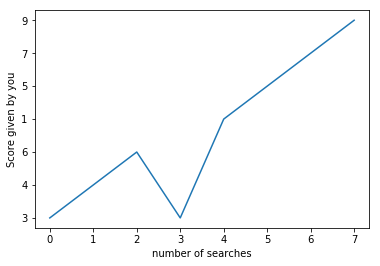

In [41]:
def to_display(doc_ids, init= False):
    if init == True:
        ix = random.sample(range(0, len(doc_vectors)), num)
    else:
        ix = doc_ids
    
    df = pd.DataFrame(columns=['index', 'Article','category'])
    df['index'] = ix
    df['Article'] = [docs[i][:100] for i in ix]
    df['category'] = [cat[qid[i]-1][:-1] for i in ix] 
    clear_output()
    display(HTML(df.to_html()))
    return ix

def get_user_choice(q):
    doc_id = random.choice(q)
    return doc_id

index = to_display([],init= True)
doc_id = input("Select the index of the article you would like to read or type 'stop' if you want end the search")
doc_id = int(doc_id)
res = []
ctr = 0
## initialize the weight vector to ones
weights = np.ones((doc_vectors.shape[1],1))
while (True):   
    query_doc = doc_vectors[doc_id].reshape(1, doc_vectors.shape[1])
    relevant_docs_ix = neighbours[doc_id]
    relevant_docs = doc_vectors[relevant_docs_ix]
    print(relevant_docs.shape)
    print(query_doc.shape)
    ## Calculate Similarity
    new_relevance = (query_doc[0] * relevant_docs) / (np.linalg.norm(relevant_docs) * np.linalg.norm(query_doc) )
    similarity  = np.matmul(new_relevance , weights)
    ## Return the num most ranked doc ids
    ranked_docs_ix = relevant_docs_ix[np.argsort(similarity[:,0])]
    index = to_display(ranked_docs_ix[:num])
    doc_id = input("Select the index of the article you would like to read or type 'stop' if you want end the search")
    if doc_id == 'stop':
        break    
    doc_id = int(doc_id)
    weights = weights + doc_vectors[doc_id].reshape(doc_vectors.shape[1], 1)
    weights = weights/ np.linalg.norm(weights)
    ctr += 1
    res_ = input("Give the precision count/a number between 1-10 about how satisfied are you with the results")
    res.append(res_)
print('Enjoy your Article')

plt.plot(res)
plt.xlabel("number of searches")
plt.ylabel("Score given by you")

In [39]:
x = np.ndarray(dtype=int, shape=(1,3), buffer=np.array([1,2,3]))
y = np.ndarray(dtype=int, shape=(5,3), buffer=np.array([[1,2,3], [1,2,3], [1,2,3], [1,2,3], [1,2,3]]))
print(x)
print(y)
x*y

[[1 2 3]]
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


array([[1, 4, 9],
       [1, 4, 9],
       [1, 4, 9],
       [1, 4, 9],
       [1, 4, 9]])

### 2. Rocchio Algorithm
- Initially random articles are displayed
- Select an index value based on your choice
- Select all the indices of relevant documents
- Update the centroid of relavant vector as shown in the formula above
- Display the nearest neighbours of the relavant vector

- $alpha$- how close to relavant 
- $beta$ - how far from non relevant

Ideally we would like to have high $alpha$ and low $beta$

In [42]:
alpha = 1.0
beta = 0.5
index = to_display([],init= True)
while(True):
    doc_id = input("Select the index of the article you would like to read or type 'stop' if you want end the search")
    if doc_id == 'stop':
        break
    print("Enter the indices, comma separated for relevant documents")
    R = [int(x) for x in input().split(',')]
    NR = [i for i in index if i not in R]
    doc_id = int(doc_id)
    query_doc = doc_vectors[doc_id].reshape(1, doc_vectors.shape[1])
    R_docs = doc_vectors[R]
    NR_docs = doc_vectors[NR]

    q_new = query_doc + (alpha * np.sum(R_docs, 0)/len(R)) - (beta * np.sum(NR_docs, 0)/len(NR))
    print(q_new.shape)
    retrieved = KNN.kneighbors(q_new, return_distance=False)
    index = to_display(retrieved[0][:num])
    
print('Enjoy your article')

,index,Article,category
0,656,Operation_Passage_to_Freedom \nThe United Stat...,History
1,2314,History_of_the_Philippines \nJapan launched a ...,History
2,536,Yellowstone_fires_of_1988 \nSince Yellowstone ...,History
3,2399,History_of_the_Philippines \nIn 1380 Karim ul'...,History
4,2760,"History_of_the_Philippines \nIn August 1759, C...",History
5,1763,History_of_the_Philippines \nThe United States...,History
6,793,Operation_Camargue \nA model of a typical Viet...,Warfare
7,209,Homer_Simpson \nHomer Simpson is one of the mo...,Media
8,1166,Hungarian_Revolution_of_1956 \nDespite Cold Wa...,History
9,2391,History_of_the_Philippines \nThe Philippines h...,History


Select the index of the article you would like to read or type 'stop' if you want end the searchstop
Enjoy your article


### Please answer the questions below to complete the experiment:

In [0]:
#@title In Rocchio Algorithm, the 'beta' parmameter deterimines how close one is the to relavant documents?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["TRUE","FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [48]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4824
Date of submission:  09 May 2019
Time of submission:  22:30:21
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
